### Select Target Repos

In [1]:
import pandas as pd

In [2]:
readmes = pd.read_csv("clustering_ef_repos/select_projects.csv")

In [3]:
readmes

,project_id,project_name,artifact_url,readme_md,readme_success
0,+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=,yieldprotocol,https://github.com/yieldprotocol/yieldcurity,NaN,False
1,+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=,yieldprotocol,https://github.com/yieldprotocol/backd-integra...,# Yield Top-up Handler\nThis is a handler for ...,True
2,+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=,yieldprotocol,https://github.com/yieldprotocol/vault-v2,# Yield Protocol Vault v2\n\nThe Yield Protoco...,True
3,+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=,yieldprotocol,https://github.com/yieldprotocol/yieldspaceamo,# YieldSpaceAMO\n\n### Pre-install\n\n - Insta...,True
4,+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=,yieldprotocol,https://github.com/yieldprotocol/yvarb,# Forge\n`npm run prepare` will do the followi...,True
...,...,...,...,...,...
88892,zo9qxhmydWM7A+5jt/VDy+AMw4oYBgDxHstPsJND4nI=,likecoin,https://github.com/likecoin/likecoin-api-public,NaN,False
88893,zph1aZrGwgAHUE2kOj3M27r8GArU+LDw978zonl0JL8=,etherscan,https://github.com/etherscan/awesome-etherscan,NaN,False
88894,zph1aZrGwgAHUE2kOj3M27r8GArU+LDw978zonl0JL8=,etherscan,https://github.com/etherscan/ethvalidate,NaN,False
88895,zph1aZrGwgAHUE2kOj3M27r8GArU+LDw978zonl0JL8=,etherscan,https://github.com/etherscan/hardhat-etherscan,NaN,False


In [4]:
from pyoso import Client
import dotenv

In [5]:
OSO_API_KEY = dotenv.dotenv_values(".env")["OSO_API_KEY"]

In [6]:
client = Client(api_key=OSO_API_KEY)

In [7]:
ossd_projects = client.to_pandas("""
    SELECT DISTINCT project_id 
        FROM oso.projects_v1
        WHERE project_source = 'OSS_DIRECTORY'
""")

In [8]:
readmes = readmes[readmes["project_id"].isin(ossd_projects["project_id"]) & readmes["readme_success"]].reset_index(drop=True)

In [9]:
project_ids = list(readmes['project_id'].unique())
artifact_urls = list(readmes['artifact_url'].unique())

# wrap each in single quotes
quoted_ids = ",".join(f"'{i}'" for i in project_ids)

In [10]:
query = f"""
  SELECT DISTINCT
    artifact_id,
    artifact_url
    FROM repositories_v0
    WHERE project_id IN ({quoted_ids})
"""

print(query)

artifacts = client.to_pandas(query)


  SELECT DISTINCT
    artifact_id,
    artifact_url
    FROM repositories_v0
    WHERE project_id IN ('+23Zdzkjvbm1oBqFXYk0fh6DmZdwKHTEnVAWshB1+Ww=','+5wSnOBMuTGg+TL5BqJbnmVUiHD3xo6ObbJ4i/IuVvw=','+9bawq5NYRCpkNWhZLP0xiV1auWQDC44XKnEiL84vro=','+ADSUTyjhzlhgOrKrIaC9YZKQv/iwN8KkQp/pey9yXY=','+BHNV3VOMSBlkgUBIR+68gzwhgxfbjW3QviiqJ6VLk4=','+Bk1LrnComAZnT98aDKSGzRHWEZX4EX+gU9T8cGXZh8=','+BxDgqyTCQ4517+eF9GHZk4ZS9tQGfeTotK/6Hf6j10=','+F2+cSg+syN69DLLpAtOKJD+eYDF+1WfsJbyfBTN/vs=','+SkK9cDn1QkdJeeal7WMrFL9d4eB5YA0ZLCEbo7A+xw=','+UbNRQ+T3SOxGcv1uTpMu/2Wp2AdW3ScfzvBHKHQUYI=','+XhHca8BgaHh6FqyuTyafN7TItSjSxMfsmilcwtiSBQ=','+Ymmw+vrkUKz/GcbCMU7IZTpQZg6OoFj1JJT00xXKOE=','+Yqnb1vNtZ7qeamha1KsaDhLsAIFFNR4ZVgM4svDOZ4=','+ebXG+UZtpQIdT9ZSDCE5OLuCnXdBOXpEgCzpEhngOI=','+j/ph+JHhaEgEf3Imq9pBEigIGx3gqO+Gp0iKsoEZIU=','+nGkjscqutwnMAH4FeLBsTaKd+fJUbXdWN9Hu4Qf4/M=','+tww/VtvIhfdjUD+sVqV94kuKdlTwm1QnW4BYD3XKjQ=','+uFapRXOuI5BlQGhpxy4e4oc1nDA4HzgHZ3XSUTUwZY=','+yjGObFWWxg+N5sEQ88ciuufbuGOhVEFlzbiH9lUo7Y=','/+3

In [11]:
artifacts = artifacts[artifacts["artifact_url"].isin(artifact_urls)]

In [12]:
final_artifact_ids = list(artifacts["artifact_id"].unique())

In [13]:
len(final_artifact_ids)

31622

In [14]:
final_artifact_ids

['BqzJLECfzWWF04a6N1Ck6v1mqK6R2VpoMu35g2EJfXo=',
 'LSnVGSjVWTk12RFprgNngymJvQGSVIpzDW834AG1qfU=',
 'EKkPTa5YoMIkXunvl3QiMditFC3O0JAgTdesxtOSfTM=',
 'xEOwgEaZF0esPd9Fe31EgaL6sWzFuUBbmWaW10YWfIc=',
 'R5tMqKZS9HG84rXxBUGOJQSGr74iHtaLun/OZpJaNZs=',
 '9SIs0n42qaL9MckVyGiOBD8RoeZ3vx+0xTFyI68MQiI=',
 'Ynu51t1TOmSaQ3qvtJS8tEhAr5b8AKXxNkwFHgAq/cU=',
 'Cj5tpXbqTpR8su0cFOVb9dsu+CA6/vSknC2wowybit4=',
 'edalVaYcR2iKxbP0A3XeYnqWnQUoE1xzdEb+2i6H1yM=',
 'pvRg7RNpZqHeOJjpztu0E7Fl5GOQH0hw/NfYtWWbTHc=',
 'IfCmjrDBICtintnzzD8ha39W83sDicDMzm+PChqjOuA=',
 '3kqnJQzCNCruNvyzfv8AS5x6xaGBhw5rTowHbZBcBck=',
 'FQ9ElSyl0Ssj68KBOJy5xRLHZpygdL4nUVq5z6KOz/Y=',
 '/jhCyiinLTDQaXd4V24PIPdsuLvfPz22kJ4Ao4XgWVg=',
 '1HKx4gYYYCLTVGmU9j3fCySgoNfHqdjkUKcCRc9QBRc=',
 'sVSWAWyAy+IKIVBsXgwwsocWCz1iWXZpQSEdAoTV1oo=',
 'cFGSKc1lDOt90ck2Wh1K8IZejAzTlIyVI8U7yd+sEB4=',
 'Gcm07kmty0GduZfBE5ZnitB/4uOOMpzDXDXThMZUui4=',
 '6Lpv4Phgcd70/uE0C9JkSWxCcmQ3S3i7VE7rBm9dbI4=',
 'OnI2VoGk806xtwisEXLH7yPHG9d2P7CHwA4YVSOk2g0=',
 'M1mGv0TJqPlZYPM714

In [15]:
query = f"""
  SELECT
    tm.artifact_id,
    SUM(tm.amount) AS total_stars
  FROM timeseries_metrics_by_artifact_v0 AS tm
  JOIN metrics_v0 AS m
    ON tm.metric_id = m.metric_id
  WHERE tm.sample_date >= DATE '2025-01-01'
    AND m.metric_name LIKE '%stars_monthly'
  GROUP BY tm.artifact_id
  HAVING SUM(tm.amount) > 3
"""

print(query)

timeseries_github_metrics_by_artifact_id = client.to_pandas(query)


  SELECT
    tm.artifact_id,
    SUM(tm.amount) AS total_stars
  FROM timeseries_metrics_by_artifact_v0 AS tm
  JOIN metrics_v0 AS m
    ON tm.metric_id = m.metric_id
  WHERE tm.sample_date >= DATE '2025-01-01'
    AND m.metric_name LIKE '%stars_monthly'
  GROUP BY tm.artifact_id
  HAVING SUM(tm.amount) > 3



In [16]:
timeseries_github_metrics_by_artifact_id

,artifact_id,total_stars
0,OqzhnpVS7PJDGWf/U+Sw8OgBe5uQhLEbVbzqBUOLKgI=,7
1,aVL9V7FlsVrXhsqM1OJFE1oVDV/FEoegW0Z+3hirvOs=,4
2,ScW17lHqB7F0zoz4QwutFo2cWG61IZUM6ojcyO7JMUE=,4
3,7/Xz8DtqqMxvfONyMG8TcIBvYvS4Z3xHRIAsqNVbpgc=,8
4,KYVlrRClHwH3i/+ngNfRPCuiNWpXjpLEcVXWq548ic4=,9
...,...,...
586961,bHDZ7ElIi1dGJOCUy7dxKjXc587SQaKnFYXcIJRvNSs=,5
586962,xQlu9/j1xtOHZNL0O1BkrQD+d83JL9GAZsi5V1xvniI=,7
586963,8PiGyWpzlsW4MOMJBq3pSPqIElsD6pPkjxrgJEtAcoo=,6
586964,zH9psovmr45po7EgSaAAqSfyQRsaFCQHNDH/3DTIHxQ=,4


In [17]:
timeseries_github_metrics_by_artifact = artifacts.merge(timeseries_github_metrics_by_artifact_id, on="artifact_id", how="inner")

In [18]:
timeseries_github_metrics_by_artifact

,artifact_id,artifact_url,total_stars
0,9SIs0n42qaL9MckVyGiOBD8RoeZ3vx+0xTFyI68MQiI=,https://github.com/azure/ai-foundry-workshop,44
1,3kqnJQzCNCruNvyzfv8AS5x6xaGBhw5rTowHbZBcBck=,https://github.com/aave/protocol-subgraphs,8
2,FQ9ElSyl0Ssj68KBOJy5xRLHZpygdL4nUVq5z6KOz/Y=,https://github.com/microsoft/typeagent,66
3,6Lpv4Phgcd70/uE0C9JkSWxCcmQ3S3i7VE7rBm9dbI4=,https://github.com/salesforce/cloudsplaining,60
4,vQtG5E1qcvIa+KqPE4tGaGCa6O2ROVS7Pk1yKHtZG8o=,https://github.com/ensdomains/thorin,5
...,...,...,...
3386,Wj5Rmh4333OV/1g/3wQxwcy7kZ9dZCzjPW1qpPnBmg8=,https://github.com/julialang/example.jl,4
3387,JhqsPVIn/2r+HPmzwBq0B/uJ0urWp9MTYCl5tN1RS7M=,https://github.com/mozilla/standards-positions,15
3388,aSoUsLEHZV37pfdufnp1nqKkBVIDKwLA74bPZlypCTw=,https://github.com/mozilla/sccache,293
3389,00JQ2MQtEJu94k7wmsNxzTpbwUhiXXzaDzC+tGiiy40=,https://github.com/google/mail-importer,6


In [19]:
readmes.merge(timeseries_github_metrics_by_artifact, on="artifact_url", how="inner").groupby("project_id")["total_stars"].max()

project_id
+9bawq5NYRCpkNWhZLP0xiV1auWQDC44XKnEiL84vro=    1482
+BHNV3VOMSBlkgUBIR+68gzwhgxfbjW3QviiqJ6VLk4=      12
+Bk1LrnComAZnT98aDKSGzRHWEZX4EX+gU9T8cGXZh8=      14
+BxDgqyTCQ4517+eF9GHZk4ZS9tQGfeTotK/6Hf6j10=      19
+F2+cSg+syN69DLLpAtOKJD+eYDF+1WfsJbyfBTN/vs=      14
                                                ... 
vIcEuW75/eNntX9v/eSZwPnobwNCVdH901KDqodTEK8=     410
vPr/a2lmWxVf6eZtLjwgO0qTIOZlv9ccX0SUWVcbeXQ=      51
vT4RT0YAEZf31b44hJeSGGGaDdJXLaCIQ/Q9EZKm1dc=       6
vTtlxl4je0s7sfTJqtg4/pLlDaN0N6OEHKGGUC95zoo=       8
vYAfUcKMaF0otodlXyEDQ8EHH3UeT+CxHKyCiPP3GFQ=     116
Name: total_stars, Length: 361, dtype: Int64

In [20]:
merged = readmes.merge(
    timeseries_github_metrics_by_artifact,
    on="artifact_url",
    how="inner"
)

best_per_project = (
    merged
    .sort_values(["project_id","total_stars"], ascending=[True, False])
    .drop_duplicates("project_id", keep="first")
    [["project_id","project_name","artifact_id","artifact_url","readme_md","total_stars"]]
    .reset_index(drop=True)
)

In [21]:
best_per_project

,project_id,project_name,artifact_id,artifact_url,readme_md,total_stars
0,+9bawq5NYRCpkNWhZLP0xiV1auWQDC44XKnEiL84vro=,nrwl,qdU2t3H2SXlsv4jnf2NPrw5J9O87lg7i+SFh/Fy8rKM=,https://github.com/nrwl/nx,"<p style=""text-align: center;"">\n <picture>\n...",1482
1,+BHNV3VOMSBlkgUBIR+68gzwhgxfbjW3QviiqJ6VLk4=,ipfs-search,7BAylpn5uRrHr1A4JVxYNxbP0mSfGNYxnuk73fEvrEc=,https://github.com/ipfs-search/ipfs-search,# [ipfs-search.com](https://ipfs-search.com)\n...,12
2,+Bk1LrnComAZnT98aDKSGzRHWEZX4EX+gU9T8cGXZh8=,valora-inc,uYnQfDin6cb0laqz91s3xvafDv0zEnIu6rConnLEq3c=,https://github.com/valora-inc/wallet,# Valora Mobile App\n\n![Checks](https://githu...,14
3,+BxDgqyTCQ4517+eF9GHZk4ZS9tQGfeTotK/6Hf6j10=,dapptools-dapphub,T6v+YGB5HylQBF6rItkMy5xWLSQ/2LP9KutP0jI7AP4=,https://github.com/dapphub/dapptools,# Dapp tools by DappHub [![Chat](https://img.s...,19
4,+F2+cSg+syN69DLLpAtOKJD+eYDF+1WfsJbyfBTN/vs=,lukechampine,J8mOHB0WNoR/MU75j27AEQcfRnqDyz6GVsGOr/YvRHs=,https://github.com/lukechampine/blake3,blake3\n------\n\n[![GoDoc](https://godoc.org/...,14
...,...,...,...,...,...,...
356,vIcEuW75/eNntX9v/eSZwPnobwNCVdH901KDqodTEK8=,pytest-dev,wHSV8XgmWXk4kH1JViVJbE4/NtdNP4PuiEYGOJqcOfE=,https://github.com/pytest-dev/pytest,.. image:: https://github.com/pytest-dev/pytes...,410
357,vPr/a2lmWxVf6eZtLjwgO0qTIOZlv9ccX0SUWVcbeXQ=,arkworks-rs,7utlRH8JRB2eDVif6TlKlHqZvVXMuk4o71CjbSCvLuE=,https://github.com/arkworks-rs/algebra,"<h1 align=""center"">arkworks::algebra</h1>\n\n<...",51
358,vT4RT0YAEZf31b44hJeSGGGaDdJXLaCIQ/Q9EZKm1dc=,defi-wonderland,6tXOkQZny4aWf0Ud+cRaqnrufoLDeBnP6VKMx3VqHu0=,https://github.com/defi-wonderland/opusdc,# Bridged USDC Standard for the OP Stack\n\nUS...,6
359,vTtlxl4je0s7sfTJqtg4/pLlDaN0N6OEHKGGUC95zoo=,perlin-network,oq6sYJisiB/ty8LZA2uPovK8dWbbvOf8olU/3ZY6X3s=,https://github.com/perlin-network/noise,# noise\n\n[![GoDoc][1]][2] [![Discord][7]][8]...,8


### Generate Summaries

In [22]:
generate_summary_prompt = """
  You are a concise project summarizer with a focus on project type.
  • Input: the full contents of a repository's README.
  • Task: Read the README and produce a very short summary (1-2 sentences) that:
    1. Begins by stating what type of project this is (e.g., “This is an IDE…”, “This is a contracts library…”, “This is a code formatter…”).
    2. Then describes its core functionality or primary purpose.
  • Output only the summary text—no bullet points, no metadata.

  Example format:
  <summary>
  This is an IDE for Ethereum smart-contract development with a built-in debugger and scripting console.
  </summary>

  Now process the following README:
  ```markdown
  {readme}
  ```
"""

classify_repo_prompt = """
  You are a project-type classifier.
  • Inputs:
    - A project summary that names its type.
    - A JSON array of candidate labels.
  • Task: **Choose exactly one** of the labels in the array.
    **Do NOT invent or hallucinate any new labels.**
  • Output as JSON:
    {{
      "assigned_tag": "<one of the input labels>",
      "reason": "<one brief sentence why>"
    }}

  Summary:
  ```markdown
  {summary}
  ```

  Candidate labels:
  ```json
  {tags}
    ```
"""

from pydantic import BaseModel

class SummaryOutput(BaseModel):
    """
    Output of the Summarization Pass:
    - summary: a 2-3 sentence elevator-pitch of the project
    """
    summary: str

class ClassificationOutput(BaseModel):
    """
    Output of the Classification Pass:
    - assigned_tag: the single chosen tag
    - reason: brief justification for that choice
    """
    assigned_tag: str
    reason: str

In [26]:
from google import genai

GEMINI_API_KEY = dotenv.dotenv_values(".env")["GEMINI_API_KEY"]
gemini_client = genai.Client(api_key=GEMINI_API_KEY)

def execute_query(prompt: str, structured_output: object) -> str:
  response = gemini_client.models.generate_content(
      model="gemini-1.5-flash",
      contents=prompt,
      config={
          "response_mime_type": "application/json",
          "response_schema": structured_output,
      },
  )

  return response.parsed

In [27]:
def make_summary(readme: str) -> SummaryOutput:
    prompt = generate_summary_prompt.format(readme=readme)
    return execute_query(prompt, SummaryOutput)

best_per_project["summary_obj"] = best_per_project["readme_md"].apply(make_summary)
best_per_project["summary"] = best_per_project["summary_obj"].apply(lambda o: o.summary)

In [28]:
best_per_project.to_csv("clustering_ef_repos/best_per_project.csv", index=False)

### Categorize

In [29]:
CATEGORIES = [
    # ─────────────────── Ethereum core software ───────────────────
    {
        "category": "Execution Clients",
        "description": (
            "Full-node implementations of the Ethereum execution (EVM) layer: "
            "transaction pool, state transition, JSON-RPC server, and local dev-net tooling "
            "(e.g., geth, Nethermind, Besu, Erigon)."
        ),
    },
    {
        "category": "Consensus Clients",
        "description": (
            "Beacon-chain clients that handle PoS consensus, p2p networking, and validator duties "
            "(e.g., Prysm, Lighthouse, Teku, Nimbus, Lodestar)."
        ),
    },

    # ─────────────────── Layer-2 & cross-chain ───────────────────
    {
        "category": "L2s & Scaling Solutions",
        "description": (
            "Optimistic / ZK rollup stacks, side-chains, and modular DA layers.  Includes core node "
            "software, bridges, proving circuits, fault/validity proof services, and SDKs "
            "(e.g., OP-Stack, Arbitrum Nitro, Scroll, zkSync, Starknet)."
        ),
    },
    {
        "category": "Interoperability & Cross-chain",
        "description": (
            "Bridging frameworks, state-proof libraries, messaging protocols, and Superchain / Cosmos-IBC "
            "tooling that move assets or data between Ethereum and other networks."
        ),
    },

    # ─────────────────── On-chain software (end-user protocols) ───────────────────
    {
        "category": "DeFi Protocols",
        "description": (
            "Capital markets, DEXes, lending, derivatives, liquid staking, stablecoins, asset managers, "
            "and related smart-contract systems (e.g., Uniswap, Aave, Curve, Maker).  Includes both "
            "core contracts and associated SDKs."
        ),
    },
    {
        "category": "On-chain Applications & DApps",
        "description": (
            "General-purpose on-chain apps such as NFT marketplaces, social or gaming contracts, DAOs, "
            "governance dashboards, or any higher-level product that end-users interact with directly."
        ),
    },

    # ─────────────────── Developer libraries & tooling ───────────────────
    {
        "category": "Language & Compilation Tools",
        "description": (
            "Compilers, interpreters, language servers, and syntax utilities for smart-contract languages "
            "(Solidity, Vyper, Fe, Huff, Yul, etc.).  Cover source-to-bytecode, static analysis, "
            "symbolic execution, and IR pipelines."
        ),
    },
    {
        "category": "Core Protocol Interfaces",
        "description": (
            "Web3 SDKs, ABI encoders/decoders, signing & key-management libs, JSON-RPC clients, "
            "transaction builders, and reusable contract libraries (OpenZeppelin, safe-SDK, viem, ethers)."
        ),
    },
    {
        "category": "Development Frameworks",
        "description": (
            "End-to-end toolchains that scaffold, build, test, and deploy Solidity/Vyper projects "
            "(Foundry, Hardhat, Truffle, Brownie, Dapp-Tools, Ape-Framework, forge-std, BoarD)."
        ),
    },
    {
        "category": "Deployment & Lifecycle Management",
        "description": (
            "CLI/SDK utilities for deterministic deployments, proxy upgrades, CREATE2 factories, "
            "network publishes, governance hooks, and on-chain migrations "
            "(openzeppelin-upgrades, thirdweb deployer, safe-factory, --verify plugins)."
        ),
    },
    {
        "category": "Testing & Verification Tools",
        "description": (
            "Unit-test harnesses, fuzzers, invariant checkers, symbolic/fork testing, formal verifiers, "
            "static analyzers, and coverage reporters (forge-test, Echidna, MythX, Slither, Foundry-Anvil, "
            "hevm, Manticore)."
        ),
    },
    {
        "category": "Developer Experience Tools",
        "description": (
            "Linters, formatters, editor extensions, code generators, doc generators, and other productivity "
            "plugins (Solhint, Prettier-Solidity, vscode-solidity, docgen)."
        ),
    },

    # ─────────────────── Infrastructure & data ───────────────────
    {
        "category": "Infrastructure & Node Operations",
        "description": (
            "Tools for running / monitoring execution & consensus nodes, RPC gateways, sentry layers, "
            "log/metric collectors, MEV-boost relays, and DevOps scripts (Prometheus exporters, "
            "Grafana dashboards, erigon-tools)."
        ),
    },
    {
        "category": "Data Indexing & Analytics",
        "description": (
            "Indexers, subgraph frameworks, ETL pipelines, SQL/GraphQL APIs, on-chain event streamers, "
            "and dashboard builders (The Graph, Dune engine, Flipside, Covalent, Dozer, substreams)."
        ),
    },

    # ─────────────────── Cryptography ───────────────────
    {
        "category": "Cryptography & Primitives",
        "description": (
            "Low-level cryptographic libs: KZG, BN254, BLS, Poseidon, Keccak, ECDSA, Merkle/SSZ trees, "
            "zero-knowledge proof gadgets, SNARK/STARK circuits, and hardware-accelerated hash/sign libs."
        ),
    }
]

In [30]:
def classify_repo(summary: str) -> ClassificationOutput:
    prompt = classify_repo_prompt.format(summary=summary, tags=CATEGORIES)
    return execute_query(prompt, ClassificationOutput)

best_per_project["classification_obj"] = best_per_project["summary"].apply(classify_repo)
best_per_project["classification"] = best_per_project["classification_obj"].apply(lambda o: o.assigned_tag)

In [31]:
best_per_project.to_csv("clustering_ef_repos/best_per_project.csv", index=False)

### Plotting Dependencies

In [32]:
WHERE_KEYWORDS = """
        collection_name LIKE '%ethereum%'
        OR collection_name LIKE '%arbitrum%'
        OR collection_name LIKE '%optimism%'
        OR collection_name LIKE '%scroll%'
        OR collection_name LIKE '%polygon%'
"""

In [33]:
df_repositories = client.to_pandas(f"""
        SELECT DISTINCT
            artifact_id,
            artifact_namespace AS repo_owner,
            artifact_name AS repo_name,
            is_fork,
            star_count,
            fork_count,
            language,
            YEAR(created_at) AS created_year,
            YEAR(updated_at) AS last_updated_year
        FROM repositories_v0
        WHERE project_id IN (
            SELECT DISTINCT project_id FROM oso.projects_by_collection_v1
            WHERE {WHERE_KEYWORDS}
        )
    """)

In [34]:
df_packages = client.to_pandas(f"""
        SELECT DISTINCT
            package_owner_artifact_id AS artifact_id,
            package_owner_artifact_namespace AS package_repo_owner,
            package_owner_artifact_name AS package_repo_name,
            package_artifact_source AS package_source,
            package_artifact_name AS package_name
        FROM package_owners_v0
        WHERE package_owner_project_id IN (
            SELECT DISTINCT project_id FROM oso.projects_by_collection_v1
            WHERE {WHERE_KEYWORDS}
        )
    """)

In [35]:
df_dependencies = client.to_pandas(f"""
        WITH packages AS (
            SELECT DISTINCT
                package_owner_artifact_id AS artifact_id,
                package_owner_artifact_namespace AS artifact_namespace
            FROM package_owners_v0
            WHERE package_owner_project_id IN (
                SELECT DISTINCT project_id FROM oso.projects_by_collection_v1
                WHERE {WHERE_KEYWORDS}
            )
        ),
        repos AS (
            SELECT DISTINCT
                artifact_id,
                artifact_namespace
            FROM repositories_v0
            WHERE project_id IN (
                SELECT DISTINCT project_id FROM oso.projects_by_collection_v1
                WHERE {WHERE_KEYWORDS}
            )
        )
        SELECT DISTINCT
            cd.dependent_artifact_id,
            cd.dependency_artifact_id,
            cd.dependency_name,
            cd.dependency_source
        FROM int_code_dependencies AS cd
        JOIN packages ON cd.dependency_artifact_id = packages.artifact_id
        JOIN repos ON cd.dependent_artifact_id = repos.artifact_id
        WHERE packages.artifact_namespace != repos.artifact_namespace
    """)

In [36]:
df_merged = (
        df_dependencies
        .merge(df_repositories, left_on='dependent_artifact_id', right_on='artifact_id')
        .merge(df_packages, left_on='dependency_artifact_id', right_on='artifact_id')
)

cols = [
    'package_source',
    'package_name',
    'package_repo_owner',
    'package_repo_name', 
    'repo_owner',
    'repo_name',
    'star_count',
    'fork_count',
    'language',
    'created_year',
    'last_updated_year',
    'dependent_artifact_id',
    'dependency_artifact_id',
]
df_merged = df_merged[cols].drop_duplicates().reset_index(drop=True)

In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128591 entries, 0 to 2128590
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   package_source          string
 1   package_name            string
 2   package_repo_owner      string
 3   package_repo_name       string
 4   repo_owner              string
 5   repo_name               string
 6   star_count              Int64 
 7   fork_count              Int64 
 8   language                string
 9   created_year            Int64 
 10  last_updated_year       Int64 
 11  dependent_artifact_id   string
 12  dependency_artifact_id  string
dtypes: Int64(4), string(9)
memory usage: 219.2 MB


In [38]:
print(len(df_merged[df_merged["dependent_artifact_id"].isin(best_per_project["artifact_id"])]))
print(len(df_merged[df_merged["dependency_artifact_id"].isin(best_per_project["artifact_id"])]))

15689
506020


In [39]:
CATEGORIES_LIST = [c["category"] for c in CATEGORIES]

In [45]:
deps  = df_merged       
best  = best_per_project.loc[:, ["artifact_id", "classification"]]

deps_labeled = (
    deps
      # keep only edges whose both ends are in best_per_project
      .merge(best, left_on="dependent_artifact_id",
                   right_on="artifact_id",
                   how="inner")
      .rename(columns={"classification": "dependent_cat"})
      .merge(best, left_on="dependency_artifact_id",
                   right_on="artifact_id",
                   how="inner")
      .rename(columns={"classification": "dependency_cat"})
      .loc[:, ["dependent_cat", "dependency_cat"]]        # drop the extra cols
)

# build the DSM
dsm = (
    pd.crosstab(
        deps_labeled["dependent_cat"],
        deps_labeled["dependency_cat"],
        dropna=False        # keep categories with zero edges
    )
    .reindex(index=CATEGORIES_LIST, columns=CATEGORIES_LIST, fill_value=0)
)

In [46]:
dsm

dependency_cat,Execution Clients,Consensus Clients,L2s & Scaling Solutions,Interoperability & Cross-chain,DeFi Protocols,On-chain Applications & DApps,Language & Compilation Tools,Core Protocol Interfaces,Development Frameworks,Deployment & Lifecycle Management,Testing & Verification Tools,Developer Experience Tools,Infrastructure & Node Operations,Data Indexing & Analytics,Cryptography & Primitives
dependent_cat,,,,,,,,,,,,,,,
Execution Clients,41,0,0,0,0,0,0,47,0,0,4,0,0,0,0
Consensus Clients,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
L2s & Scaling Solutions,82,0,22,0,0,0,0,5,0,0,0,0,0,0,0
Interoperability & Cross-chain,202,0,25,0,1,0,0,4,21,0,4,0,0,0,0
DeFi Protocols,601,0,75,0,0,0,0,2,34,0,40,0,0,0,0
On-chain Applications & DApps,480,0,2,7,0,0,0,20,3,0,16,0,0,2,0
Language & Compilation Tools,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Core Protocol Interfaces,401,0,0,7,0,0,0,66,23,0,12,0,0,0,0
Development Frameworks,441,0,50,0,0,0,0,42,18,0,8,0,0,0,0


In [42]:
dsm.to_csv("clustering_ef_repos/dsm_matrix.csv")

### Cluster

In [95]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# for each repo, build a DSM matrix of its dependencies, then vectorize, then cluster

In [ ]:
edges = deps.loc[:, ["dependent_artifact_id", "dependency_artifact_id"]]   # dependency edges
labels = best_per_project.loc[:, ["artifact_id", "classification"]]       # dependency -> category
labels = labels.rename(columns={"artifact_id": "dependency_artifact_id",
                                "classification": "dependency_cat"})

# label each edge with the dependency's category
edges_labeled = (
    edges
      .merge(labels, on="dependency_artifact_id", how="inner")   # drop deps w/o category
      .rename(columns={"dependent_artifact_id": "repo"})
      .loc[:, ["repo", "dependency_cat"]]
)

In [60]:
# build DSM (repo × category)
DSM = (
    pd.crosstab(
        index=edges_labeled["repo"],          # rows
        columns=edges_labeled["dependency_cat"],
        dropna=False                          # keep ‘0-col’ cats
    )
    .astype(np.float32)                       # light-weight
)

# keep global constant order of cols
DSM = DSM.reindex(columns=CATEGORIES_LIST, fill_value=0)

In [ ]:
# normalise rows (each repo -> unit-length vector)
DSM_norm = pd.DataFrame(
    normalize(DSM, norm="l2", axis=1),
    index=DSM.index,
    columns=DSM.columns
)

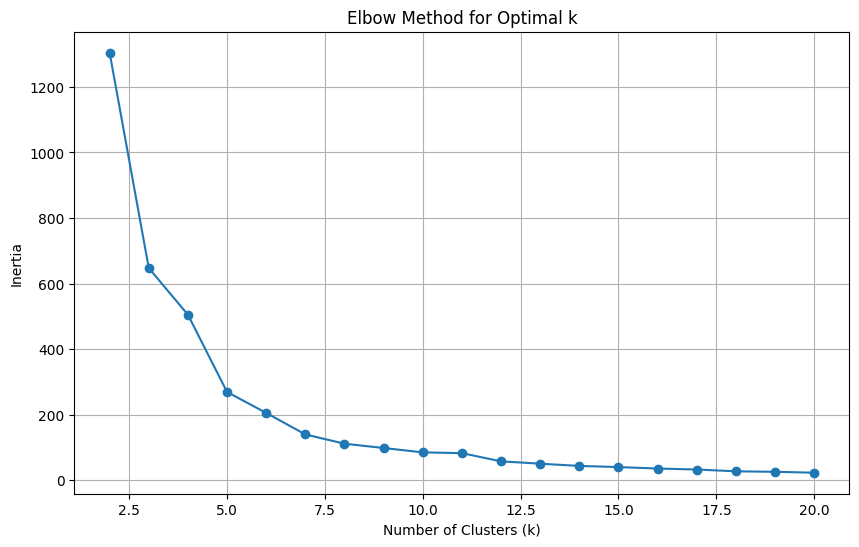

In [70]:
# scan k values from 2 to 20
k_range       = range(2, 21)
inertias      = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(DSM_norm)
    inertias.append(km.inertia_)

# plot elbow chart
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.savefig("clustering_ef_repos/elbow_method.png")

In [72]:
# cluster
final_k = 4               # chosen via elbow

final_km = KMeans(n_clusters=final_k, random_state=0, n_init="auto").fit(DSM_norm)
repo_clusters = (
    pd.DataFrame({
        "artifact_id": DSM_norm.index,
        "cluster":     final_km.labels_
    })
    .reset_index(drop=True)
)

In [102]:
repo_clusters.to_csv("clustering_ef_repos/repo_clusters.csv", index=False)

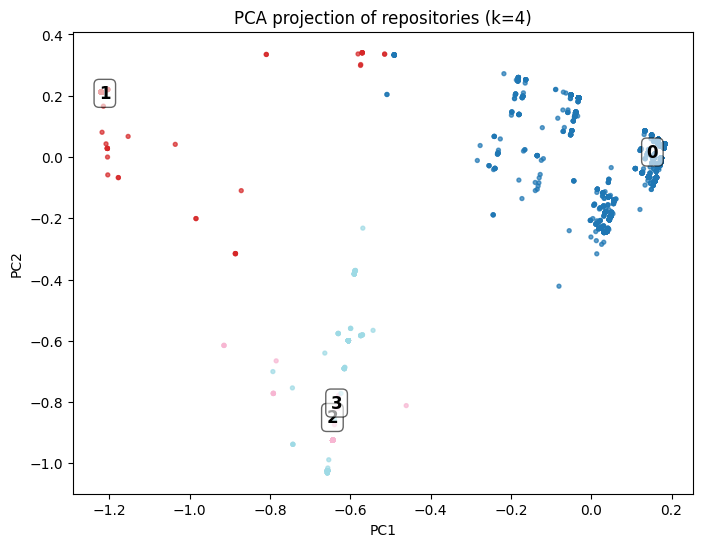

<Figure size 640x480 with 0 Axes>

In [100]:
# compute 2D PCA embedding
pca = PCA(n_components=2, random_state=0)
embedding = pca.fit_transform(DSM_norm.values)
labels = final_km.labels_

# plot with cluster centroids labeled
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    embedding[:, 0], embedding[:, 1],
    c=labels, s=8, cmap="tab20", alpha=0.7
)

# annotate each cluster at its centroid
for cluster in np.unique(labels):
    idx = labels == cluster
    x_mean = embedding[idx, 0].mean()
    y_mean = embedding[idx, 1].mean()
    ax.text(
        x_mean, y_mean, str(cluster),
        fontsize=12, fontweight='bold',
        ha='center', va='center',
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="black",
            alpha=0.6
        )
    )

ax.set_title(f"PCA projection of repositories (k={final_k})")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()
plt.savefig("clustering_ef_repos/pca_clusters.png")

### Repeating Clustering with k=3

In [103]:
final_k = 3              
final_km = KMeans(n_clusters=final_k, random_state=0, n_init="auto").fit(DSM_norm)
repo_clusters = (
    pd.DataFrame({
        "artifact_id": DSM_norm.index,
        "cluster":     final_km.labels_
    })
    .reset_index(drop=True)
)

In [104]:
repo_clusters.to_csv("clustering_ef_repos/repo_clusters.csv", index=False)

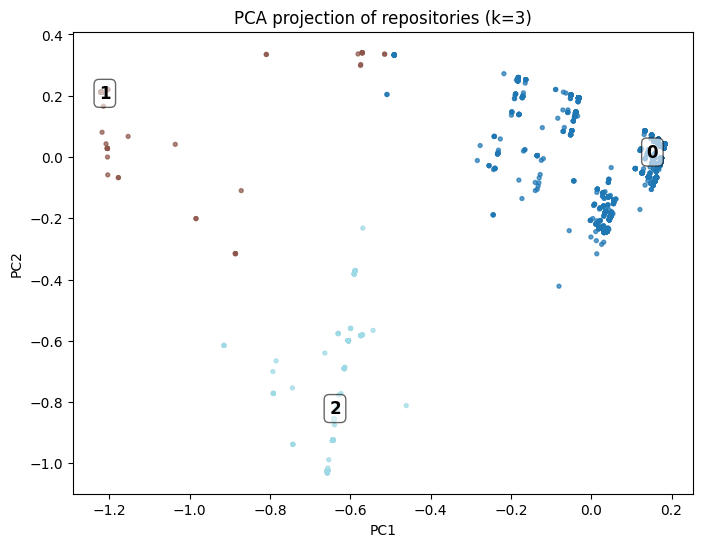

<Figure size 640x480 with 0 Axes>

In [105]:
# compute 2D PCA embedding
pca = PCA(n_components=2, random_state=0)
embedding = pca.fit_transform(DSM_norm.values)
labels = final_km.labels_

# plot with cluster centroids labeled
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    embedding[:, 0], embedding[:, 1],
    c=labels, s=8, cmap="tab20", alpha=0.7
)

# annotate each cluster at its centroid
for cluster in np.unique(labels):
    idx = labels == cluster
    x_mean = embedding[idx, 0].mean()
    y_mean = embedding[idx, 1].mean()
    ax.text(
        x_mean, y_mean, str(cluster),
        fontsize=12, fontweight='bold',
        ha='center', va='center',
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="black",
            alpha=0.6
        )
    )

ax.set_title(f"PCA projection of repositories (k={final_k})")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()
plt.savefig("clustering_ef_repos/pca_clusters.png")

In [108]:
DSM

dependency_cat,Execution Clients,Consensus Clients,L2s & Scaling Solutions,Interoperability & Cross-chain,DeFi Protocols,On-chain Applications & DApps,Language & Compilation Tools,Core Protocol Interfaces,Development Frameworks,Deployment & Lifecycle Management,Testing & Verification Tools,Developer Experience Tools,Infrastructure & Node Operations,Data Indexing & Analytics,Cryptography & Primitives
repo,,,,,,,,,,,,,,,
++ZlmFNVNFLh6qHGSiTiDnwwNO2EZNx+zJboSQ+d8Tk=,40.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,4.0,0,0.0,0.0,0.0
+/CeYJbQ7VcqBd0FIdVhsUlVZGITzfGR55Wr/2iFv7M=,40.0,0,0.0,0.0,0.0,0.0,0,0.0,1.0,0,4.0,0,0.0,0.0,0.0
+/gFR3kklj6sVHJXwumZ5exbwc2QRNDzDk9UxaSrJpM=,0.0,0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0
+0NmusdJjXiRnHR6qnq9k4ORONM3Fed3HOEiF6eKUH8=,40.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0
+0nPF5A/GSpfw3AeXG6OHsPdhUh8TUXS6bU/Rqwvjvc=,40.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,4.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxl3zBVfxTROQz/y1Uc26q/0vOqpZFn2LB1QkT37LBc=,40.0,0,25.0,0.0,0.0,0.0,0,0.0,6.0,0,4.0,0,0.0,0.0,0.0
zxpBECDBLYchSZY9JzhAqP6GokagAWWVPW5plquS380=,40.0,0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0.0,0.0,0.0
zyOakHDvCf93cPsCBCaxAoJMibFRdU9hoMKj67j0mNE=,40.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0


In [110]:
repo_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13069 entries, 0 to 13068
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artifact_id  13069 non-null  string
 1   cluster      13069 non-null  int32 
dtypes: int32(1), string(1)
memory usage: 153.3 KB


In [112]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128591 entries, 0 to 2128590
Data columns (total 13 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   package_source          string
 1   package_name            string
 2   package_repo_owner      string
 3   package_repo_name       string
 4   repo_owner              string
 5   repo_name               string
 6   star_count              Int64 
 7   fork_count              Int64 
 8   language                string
 9   created_year            Int64 
 10  last_updated_year       Int64 
 11  dependent_artifact_id   string
 12  dependency_artifact_id  string
dtypes: Int64(4), string(9)
memory usage: 219.2 MB


In [118]:
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min
import json

# buld per-repo metadata from df_merged
# keep only the columns we care about and melt dependent/dependency -> artifact_id
cols = ["star_count", "fork_count", "language", "created_year", "last_updated_year"]
meta_dep  = (df_merged
             .loc[:, ["dependent_artifact_id", *cols]]
             .rename(columns={"dependent_artifact_id": "artifact_id"}))
meta_dep["src"] = "dep"

meta_depends = (df_merged
                .loc[:, ["dependency_artifact_id", *cols]]
                .rename(columns={"dependency_artifact_id": "artifact_id"}))
meta_depends["src"] = "dependency"

repo_meta_raw = pd.concat([meta_dep, meta_depends], ignore_index=True)

# aggregate (mean for numerics, first() for strings)
numeric_cols = ["star_count", "fork_count", "created_year", "last_updated_year"]
agg_dict = {c: "mean" for c in numeric_cols} | {"language": lambda s: s.mode().iat[0] if not s.mode().empty else None}
repo_meta = (repo_meta_raw
             .groupby("artifact_id", dropna=False)
             .agg(agg_dict)
             .reset_index())

# merge with cluster assignments and DSM
repo_clusters = repo_clusters.copy()     # ['artifact_id', 'cluster']
rc = (repo_clusters
      .merge(repo_meta,  on="artifact_id", how="left")
      .merge(DSM_norm,   left_on="artifact_id", right_index=True, how="left"))


cluster_profiles = []
for cl, grp in rc.groupby("cluster"):
    size = len(grp)

    # dependency categories w/ mean weight
    cat_means = grp[DSM.columns].mean().sort_values(ascending=False)
    top_cats  = [(cat, round(w, 3)) for cat, w in cat_means.items()]

    # language distribution
    langs = (grp["language"]
             .value_counts(dropna=True)
             .head(10)  # top 10 languages
             .to_dict())                

    # popularity / age
    stars = {"mean": int(grp["star_count"].mean(skipna=True)),
             "median": int(grp["star_count"].median(skipna=True)),
             "max": int(grp["star_count"].max(skipna=True)),
             "std": round(grp["star_count"].std(skipna=True), 1)}
    
    forks = {"mean": int(grp["fork_count"].mean(skipna=True)),
             "median": int(grp["fork_count"].median(skipna=True)),
             "max": int(grp["fork_count"].max(skipna=True)),
             "std": round(grp["fork_count"].std(skipna=True), 1)}
    
    years = {"repo_created_mean": round(grp["created_year"].mean(skipna=True), 1),
             "repo_updated_mean": round(grp["last_updated_year"].mean(skipna=True), 1),
             "repo_updated_std": round(grp["last_updated_year"].std(skipna=True), 1)}


    cluster_profiles.append({
        "cluster_id" : int(cl),
        "size" : int(size),
        "dependecies by category" :  top_cats,
        "languages" : langs,
        "stars" : stars,
        "forks" : forks,
        "years" : years
    })

print(json.dumps(cluster_profiles, indent=2))

with open("clustering_ef_repos/cluster_profiles.json", "w") as f:
    json.dump(cluster_profiles, f, indent=2)

[
  {
    "cluster_id": 0,
    "size": 11393,
    "dependecies by category": [
      [
        "Execution Clients",
        0.983
      ],
      [
        "L2s & Scaling Solutions",
        0.033
      ],
      [
        "Testing & Verification Tools",
        0.029
      ],
      [
        "Development Frameworks",
        0.026
      ],
      [
        "Core Protocol Interfaces",
        0.023
      ],
      [
        "DeFi Protocols",
        0.001
      ],
      [
        "Data Indexing & Analytics",
        0.001
      ],
      [
        "Interoperability & Cross-chain",
        0.0
      ],
      [
        "Infrastructure & Node Operations",
        0.0
      ],
      [
        "Cryptography & Primitives",
        0.0
      ],
      [
        "Consensus Clients",
        0.0
      ],
      [
        "Language & Compilation Tools",
        0.0
      ],
      [
        "On-chain Applications & DApps",
        0.0
      ],
      [
        "Deployment & Lifecycle Management",
       

### Final LLM Labeling

In [119]:
PROMPT = """
    I have 3 clusters of Ethereum-ecosystem repositories. 
    For each cluster you will receive a JSON object whose keys are:

    • cluster_id - integer  
    • size - number of repositories  
    • dependencies by category - list of the dependency categories with weights   
    • languages - dict of most common implementation languages  
    • stars / forks - mean, median, max, std popularity   
    • years - mean creation/last-update year  
    
    Please propose a concise, human-readable label (3-5 words) that best describes each cluster's overall theme, a short explanantion for why you chose this, and then a representative one sentence summary that describes the repos in the cluster. Respond with a list of objects: 
    { "cluster_id": int, "label": string, "one_sentence_explanation": string, "one_sentence_summary_: string }
"""

In [120]:
# used chat-gpt's O3 model
cluster_labels = [
    {
        "cluster_id": 0,
        "label": "DApp Front-Ends & SDKs",
        "one_sentence_explanation": "Execution-client libraries dominate its dependencies and the codebase is overwhelmingly JavaScript/TypeScript, signalling user-facing apps and developer SDKs that sit on top of the EVM.",
        "one_sentence_summary_": "A huge set of JS/TS repositories providing wallets, web UIs, and SDKs that interact with Ethereum through libraries like ethers.js and web3.js."
    },
    {
        "cluster_id": 1,
        "label": "Protocol Interface Libraries",
        "one_sentence_explanation": "Nearly every repo depends on core-protocol interface packages, pointing to collections of typed bindings, RPC helpers, and EIP reference implementations.",
        "one_sentence_summary_": "These newer repos package standardized ABI definitions, RPC wrappers, and spec-driven helpers that make raw Ethereum protocol calls easier for developers."
    },
    {
        "cluster_id": 2,
        "label": "Smart-Contract Dev Tooling",
        "one_sentence_explanation": "High weights for development frameworks plus testing/verification tools—and a Solidity-heavy language mix—mark this cluster as build-and-test infrastructure for contracts.",
        "one_sentence_summary_": "Frameworks like Hardhat, Foundry, and Brownie, along with test suites and starter templates, power this collection of repos aimed at writing and verifying Ethereum smart contracts."
    }
]

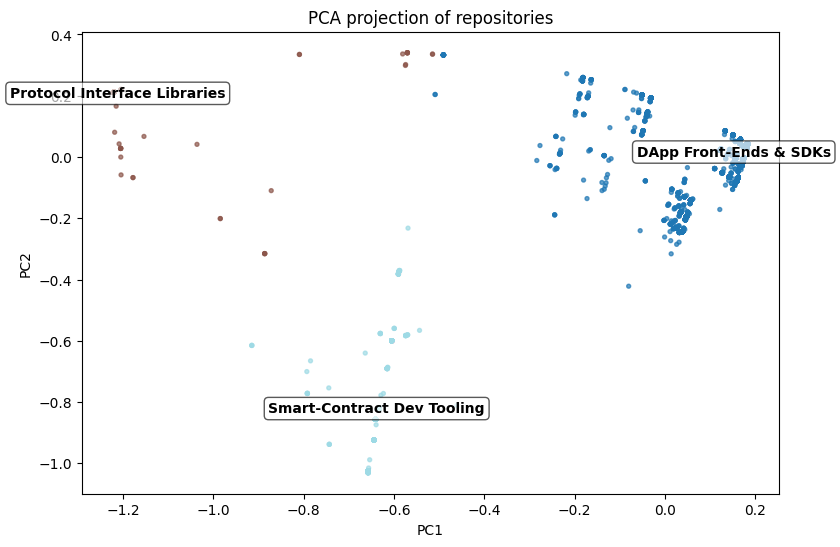

<Figure size 640x480 with 0 Axes>

In [133]:
label_map = {
    0: "DApp Front-Ends & SDKs",
    1: "Protocol Interface Libraries",
    2: "Smart-Contract Dev Tooling",
}

repo_clusters = repo_clusters.copy()
repo_clusters["cluster_label"] = repo_clusters["cluster"].map(label_map)

artifact_cluster_df = repo_clusters.loc[:, ["artifact_id", "cluster_label"]]

pca = PCA(n_components=2, random_state=0)
embedding = pca.fit_transform(DSM_norm.values)
labels_num  = repo_clusters["cluster"].values
labels_text = repo_clusters["cluster_label"].values

fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=labels_num,
    cmap="tab20",
    s=8,
    alpha=0.7,
)

for cl in np.unique(labels_num):
    idx  = labels_num == cl
    xbar = embedding[idx, 0].mean()
    ybar = embedding[idx, 1].mean()
    ax.text(
        xbar,
        ybar,
        label_map[cl],
        fontsize=10,
        fontweight="bold",
        ha="center",
        va="center",
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="white",
            edgecolor="black",
            alpha=0.65,
        ),
    )

ax.set_title("PCA projection of repositories")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()
plt.savefig("clustering_ef_repos/pca_clusters_final_labels.png")

In [131]:
final_artifacts_with_clusters = artifacts.merge(artifact_cluster_df, on="artifact_id", how="inner")\
    .merge(df_merged, left_on="artifact_id", right_on="dependent_artifact_id", how="inner")\
        .drop_duplicates("dependent_artifact_id").drop(columns=["dependent_artifact_id", "dependency_artifact_id"])

In [132]:
final_artifacts_with_clusters.to_csv("clustering_ef_repos/final_artifacts_with_clusters.csv", index=False)